In [76]:
!pip install nltk
!pip install sentence-transformers
!pip install contractions
!pip install bertopic
!pip install gensim
!pip install pyLDAvis
!pip install spacy
!pip install requests
!pip install beautifulsoup4
!pip install lxml
!pip install transformers 
!pip install pyvis
!pip install matplotlib

In [77]:
import requests
import pandas as pd
import bs4 as bs
import urllib.request
import json
import contractions
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from spacy import displacy
from bertopic import BERTopic
import os
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
import pyLDAvis
import gensim
import spacy
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from gensim import corpora
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import math
import torch
from pyvis.network import Network


In [78]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [79]:
import warnings
warnings.filterwarnings('ignore', 'Calling')
warnings.filterwarnings('ignore', 'For a faster implementation')
warnings.filterwarnings('ignore', 'In')
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')
warnings.filterwarnings('ignore', '`np')
warnings.filterwarnings('ignore', 'SelectableGroups')

In [80]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [81]:
# data=pd.read_csv('/content/drive/MyDrive/Teams/Petabyte Transformers/Code/NLP_poems/Pushcart_Nomination.csv')

In [82]:
data=pd.read_csv('Pushcart_Nomination.csv')

In [83]:
data.head()

,Unnamed: 0,Author,Title,Poem,Year
0,0,Phoebe Bubendorfer,OIL SPILL,A red-throated loon\nmired in a slick of oil\n...,2022
1,1,Bill Graeser,THE BURNING OF THE WHALES,Fire never seems to mind\nwhether it's the cur...,2022
2,2,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.\nStaring...,2022
3,3,Lily Nelson,FEVER,You are nine\n Lying on the front room co...,2022
4,4,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spine\n...,2022


In [84]:
data.drop(['Unnamed: 0'], axis=1)

,Author,Title,Poem,Year
0,Phoebe Bubendorfer,OIL SPILL,A red-throated loon\nmired in a slick of oil\n...,2022
1,Bill Graeser,THE BURNING OF THE WHALES,Fire never seems to mind\nwhether it's the cur...,2022
2,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.\nStaring...,2022
3,Lily Nelson,FEVER,You are nine\n Lying on the front room co...,2022
4,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spine\n...,2022
5,Allison Berryhill,SONNET TO MY STUDENTS ON THE FIRST DAY OF CLASS,Come in and make a mess with all your thoughts...,2021
6,Heather Ann Clark,TURTLE SHELLS,My therapist asks what else is on my mind.\n\n...,2021
7,Jared Pearce,ILLNESS,It's like waiting for the elevator\ndoors to r...,2021
8,Shelly Reed Thieman,ON THE ANNIVERSARY OF ANOTHER WINTER,"Tongue-tied with suet and peanut\nbutter, a qu...",2021
9,Erik Trilk,DAZED AND CONFUSED,It won't be long until I'm with the moon\nthis...,2021


In [85]:
data['Poem'][0]

'A red-throated loon\nmired in a slick of oil\nstrains her neck\nin each effort\nto lift her body\nfrom the toxic sludge.\n\nOne last quiver\nof wings.\nShe lowers her head\nto her breast\neyes closed in\nacceptance.\nRainbows in her feathers.\n\n'

#0.Extracting All POS from each Poem and putting it under POS column in df

In [86]:
def clean_txt(text):
    text=text.replace(u'\xa0', u' ').replace(r'\r',u'\n').replace(r'\n', ' ').replace('\n', ' ').replace('\t', ' ')
    text = contractions.fix(text)
    text = text.strip().lower()
    text = re.sub(r"'", ' ', text)
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = ' '.join([w for w in text.split() if len(w)>1])
    text = re.sub(' +', ' ', text)
    text = ''.join(text)
    return text

In [87]:
data['Poem_for_model'] = 1

In [88]:
for i in range(len(data)):
  data['Poem_for_model'][i] = clean_txt(data['Poem'][i])


In [89]:
print(data['Poem'][3])

You are nine
      Lying on the front room couch
                        And time is thick like jelly
Fever has made the world soft
            And golden
                        Honey coating your skin
                  Stuck in your ears
      Heavy enough that moving feels like wading through a pool
                        Except worse
           Except slower and more tiring
                  Like the world is a blanket wrapped around your shoulders
And now the world is burning
            You can't smell the smoke
      But your skin feels like you've become a star
                  A bright heat coursing through your veins
            Flesh pasty and pale
      The world is too bright and hot for nothing to be burning


In [90]:
print(data['Poem_for_model'][3])

you are nine lying on the front room couch and time is thick like jelly fever has made the world soft and golden honey coating your skin stuck in your ears heavy enough that moving feels like wading through pool except worse except slower and more tiring like the world is blanket wrapped around your shoulders and now the world is burning you cannot smell the smoke but your skin feels like you have become star bright heat coursing through your veins flesh pasty and pale the world is too bright and hot for nothing to be burning


In [91]:
poems = data['Poem_for_model'].tolist()

In [92]:
print(poems)

['red throated loon mired in slick of oil strains her neck in each effort to lift her body from the toxic sludge one last quiver of wings she lowers her head to her breast eyes closed in acceptance rainbows in her feathers', 'fire never seems to mind whether it is the curl of candle wick or bed with baby sleeping so it was with the whales beached in oregon and the not knowing what else to do with the corpses if we were but fire we would not mind either but we are also water even one drop of which forms tear those who were there that day who lit the match and beheld the flames on fiery wings rise they will never forget the trembling of the sea in their chest', 'the buffalo stands still in the wind staring ahead huge not even bothering to guard its flanks mysterious majestic silent misplaced in this warm world waiting for the next interval of ice watching the horizon for the return of glaciers and the arctic birds screaming from the cold blue sky', 'you are nine lying on the front room c

In [93]:
data['POS'] = 2

In [94]:

# Load stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocess the poems
preprocessed_corpus = []
for i in range(len(data)):
    # Tokenize the poem
    tokens = nltk.word_tokenize(data['Poem_for_model'][i])
    
    # Remove stop words and lemmatize words
    processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    
    words = [nltk.word_tokenize(processed_token) for processed_token in processed_tokens]

    # Tag the parts of speech for each word
    data['POS'][i] = [nltk.pos_tag(word) for word in words]

In [95]:
data.head()

,Unnamed: 0,Author,Title,Poem,Year,Poem_for_model,POS
0,0,Phoebe Bubendorfer,OIL SPILL,A red-throated loon\nmired in a slick of oil\n...,2022,red throated loon mired in slick of oil strain...,"[[(red, JJ)], [(throated, VBN)], [(loon, NN)],..."
1,1,Bill Graeser,THE BURNING OF THE WHALES,Fire never seems to mind\nwhether it's the cur...,2022,fire never seems to mind whether it is the cur...,"[[(fire, NN)], [(never, RB)], [(seems, VBZ)], ..."
2,2,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.\nStaring...,2022,the buffalo stands still in the wind staring a...,"[[(buffalo, NN)], [(stand, NN)], [(still, RB)]..."
3,3,Lily Nelson,FEVER,You are nine\n Lying on the front room co...,2022,you are nine lying on the front room couch and...,"[[(nine, CD)], [(lying, VBG)], [(front, NN)], ..."
4,4,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spine\n...,2022,the fingered notes play up and down my spine l...,"[[(fingered, VBN)], [(note, NN)], [(play, NN)]..."


In [96]:
data['dist_pos'] = 3

#1.Plots: distributions of POS [n, v. adj, adv]


In [97]:
for poem in poems :
  sentences = nltk.sent_tokenize(poem)
  words = [nltk.word_tokenize(sentence) for sentence in sentences]
  pos_tags = [nltk.pos_tag(word) for word in words]

print(pos_tags)

[[('my', 'PRP$'), ('mother', 'NN'), ('who', 'WP'), ('spent', 'VBD'), ('the', 'DT'), ('day', 'NN'), ('after', 'IN'), ('my', 'PRP$'), ('birth', 'NN'), ('trying', 'VBG'), ('to', 'TO'), ('decide', 'VB'), ('how', 'WRB'), ('to', 'TO'), ('tell', 'VB'), ('my', 'PRP$'), ('father', 'NN'), ('she', 'PRP'), ('did', 'VBD'), ('not', 'RB'), ('want', 'VB'), ('another', 'DT'), ('child', 'NN'), ('but', 'CC'), ('went', 'VBD'), ('on', 'IN'), ('to', 'TO'), ('have', 'VB'), ('eight', 'CD'), ('more', 'JJR'), ('says', 'VBZ'), ('the', 'DT'), ('doctors', 'NNS'), ('will', 'MD'), ('tell', 'VB'), ('you', 'PRP'), ('the', 'DT'), ('pain', 'NN'), ('of', 'IN'), ('giving', 'VBG'), ('birth', 'NN'), ('is', 'VBZ'), ('erased', 'VBN'), ('by', 'IN'), ('hormones', 'NNS'), ('and', 'CC'), ('endorphins', 'NNS'), ('scrubbed', 'VBN'), ('from', 'IN'), ('the', 'DT'), ('slick', 'JJ'), ('surface', 'NN'), ('of', 'IN'), ('every', 'DT'), ('sensory', 'JJ'), ('pathway', 'NN'), ('and', 'CC'), ('the', 'DT'), ('anterior', 'JJ'), ('cingulate', 'N

In [98]:
def count_pos(array):
  ''' this method is to go through POS array and then count each POS type 
      you just have to call this function in one for loop like below cell
  '''
  pos_counts = collections.defaultdict(int)
  pos_counts.clear()
  for i in range(len(array)):
     for token, pos_tag in array[i]:
       pos_counts[pos_tag] += 1
  return pos_counts

In [99]:
for i in range(len(data)):
    data['dist_pos'][i] = count_pos(data['POS'][i]) 


In [100]:
print(data['dist_pos'][0])

defaultdict(<class 'int'>, {'JJ': 2, 'VBN': 2, 'NN': 17, 'CD': 1, 'VBG': 1, 'JJR': 1, 'VBD': 1})


In [101]:
def plot_dist_pos(dict):
  pos = list(dict.keys())
  counts = list(dict.values())

  # Create a bar plot
  plt.bar(pos, counts)
  plt.xlabel('POS')
  plt.ylabel('Count')
  plt.title('Distribution of POS in Pushcart Nominated Poem')
  plt.show()

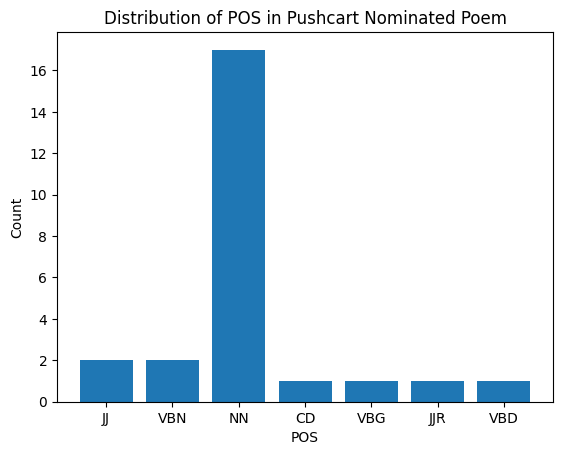

In [102]:
plot_dist_pos(data['dist_pos'][0])

#2.Compare the dist of POS in each poem


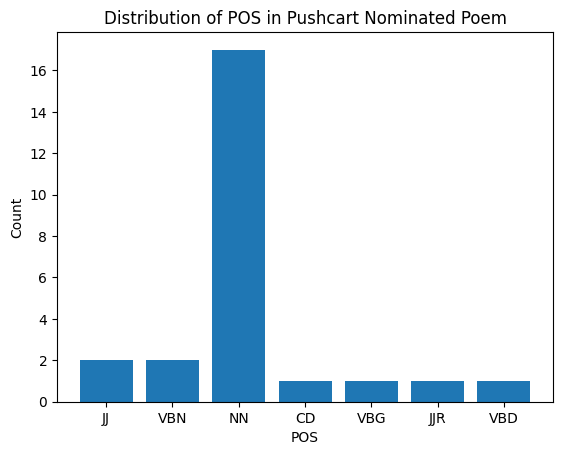

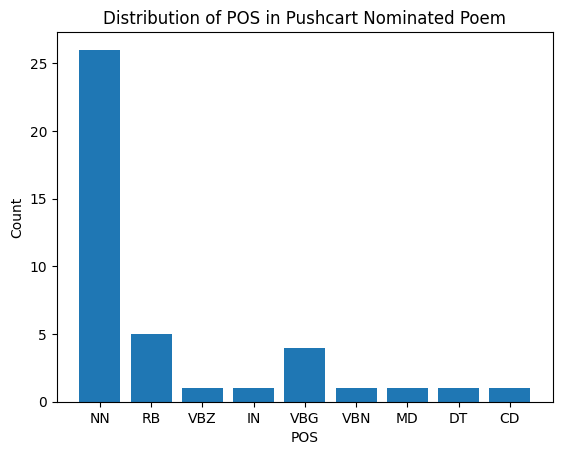

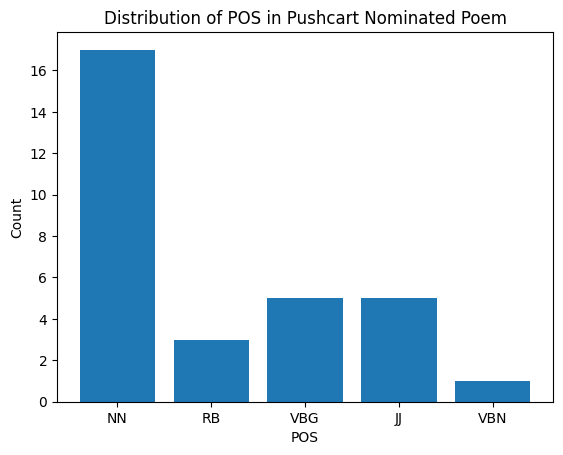

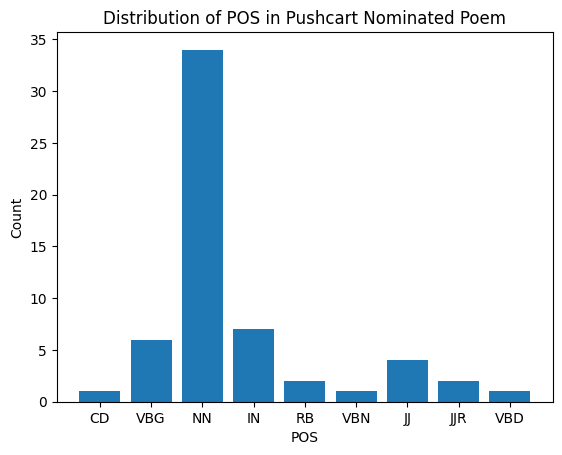

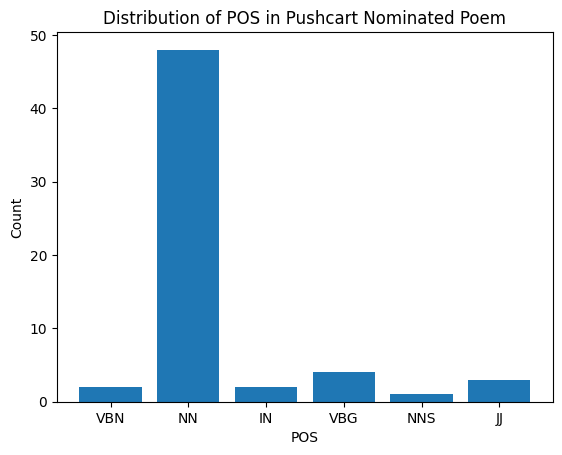

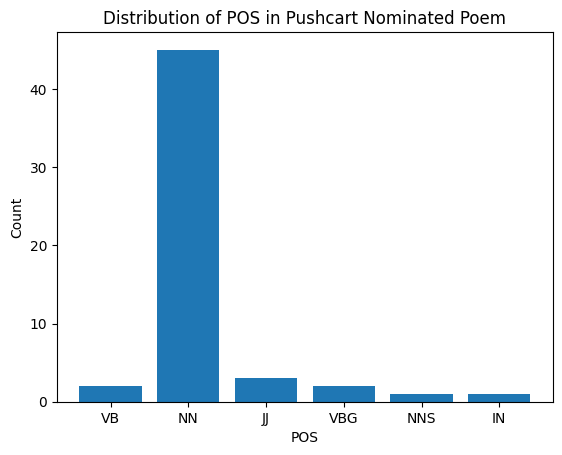

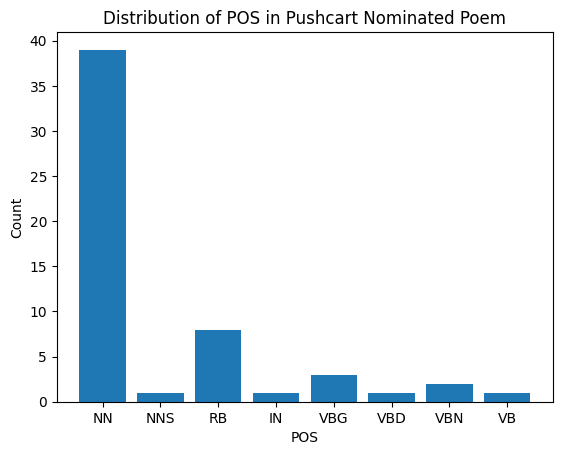

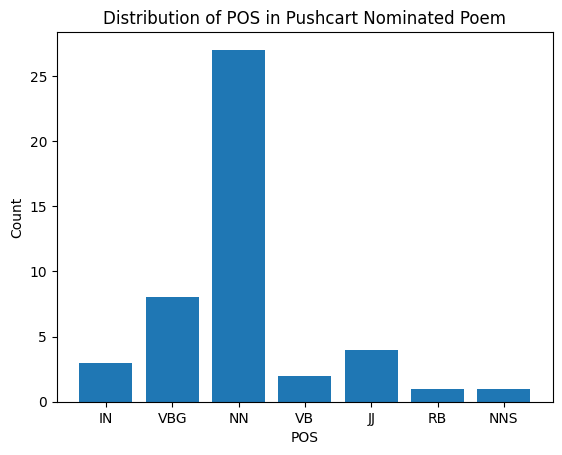

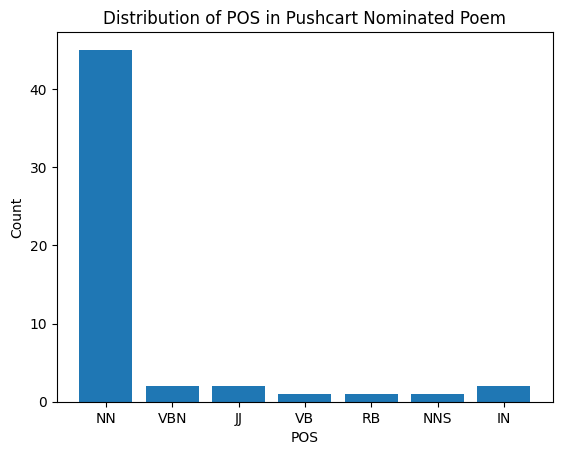

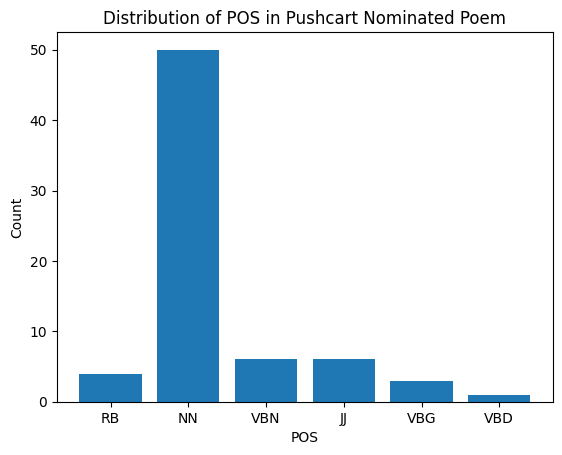

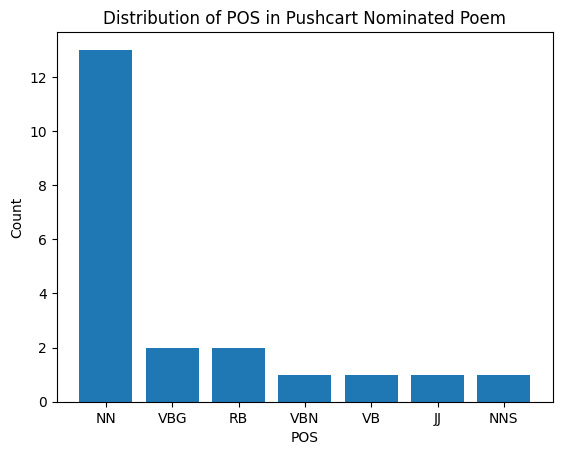

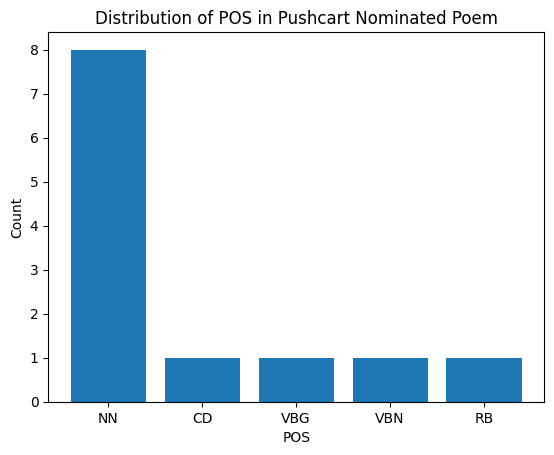

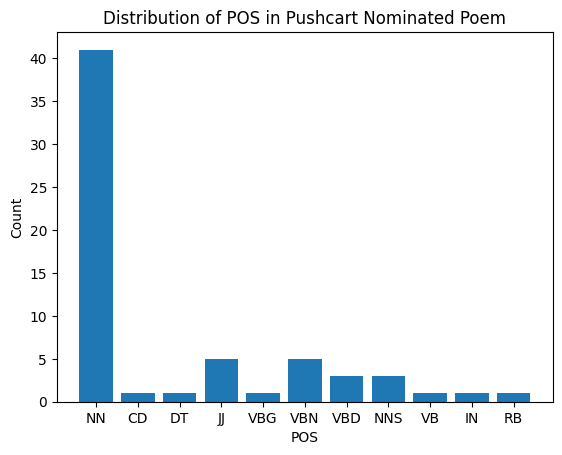

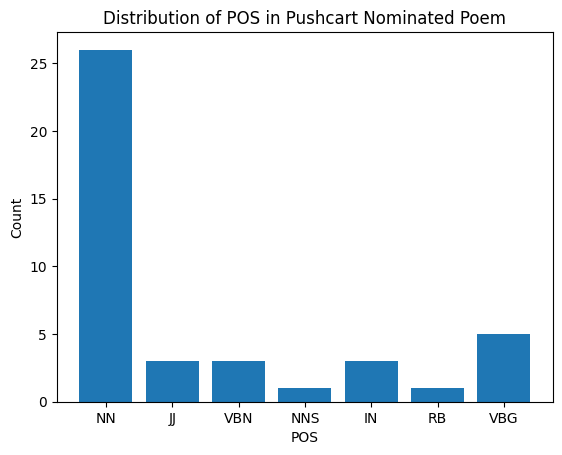

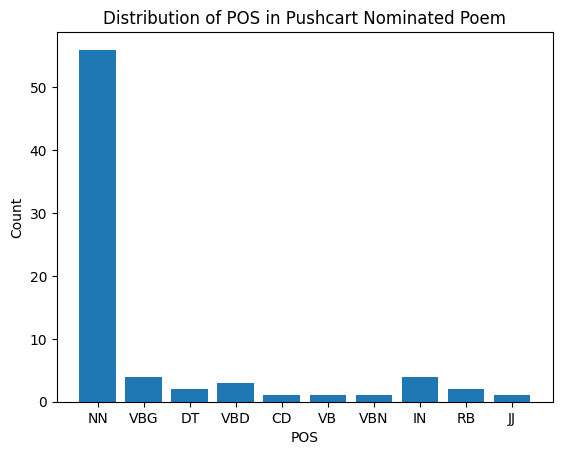

In [103]:
for i in range(len(data)):
  plot_dist_pos(data['dist_pos'][i])

In [104]:
# store_loc = "/content/drive/MyDrive/poets/"

In [105]:
store_loc = '/workspaces/CMPE257/'

In [106]:
def buildPoemArray(data):
    poet = {}
    poems = list()
    for i in data:
        idx = "poem"+str(i) ##poem1
        poet[idx+"_title"] = data[i]["Title"] #poem1_title = tien
        poet[idx] = data[i]["Poem_for_model"] # poem
        poems.append(idx)
    poet['poems_array'] = poems
    return poet

In [107]:
def extractAllPOS(poet):
    global_vrb = set()
    global_nns = set()
    global_adj = set()
    for key in poet['poems_array']:
        text = poet[key]
        word_list = word_tokenize(text)
        pos_value = nltk.pos_tag(word_list)
        poet["pos_"+key] = pos_value

        vrb = set([word for (word, pos) in pos_value if (pos.startswith('VB'))])
        nns = set([word for (word, pos) in pos_value if (pos.startswith('NN'))])
        adj = set([word for (word, pos) in pos_value if (pos.startswith('JJ'))])

        poet["verbs_"+key] = list(vrb)
        poet["nouns_"+key] = list(nns)
        poet["adjectives_"+key] = list(adj)

        global_vrb = set.union(global_vrb, vrb)
        global_nns = set.union(global_nns, nns)
        global_adj = set.union(global_adj, adj)

    poet["all_verbs"] = list(global_vrb)
    poet["all_nouns"] = list(global_nns)
    poet["all_adjectives"] = list(global_adj)
    

In [108]:
def getPOS(file_name, df):
    pos = ""
    if os.path.exists(file_name):
        with open(file_name, 'r') as file:
            pos = json.load(file)
    else:
        pos = buildPoemArray(json.loads(df.to_json(orient="index")))
        extractAllPOS(pos)
        with open(file_name, 'w') as file:
            json.dump(pos, file)
    return pos

In [109]:
file_name = store_loc + "Pushcart_Nomination.json"
pc_pos = getPOS(file_name, data)

In [110]:
def count_pos(tokens):
    pos_counts = nltk.FreqDist(tag for word, tag in nltk.pos_tag(tokens))
    return pos_counts

#3.Superimpose them on each other in terms of ratios of POS

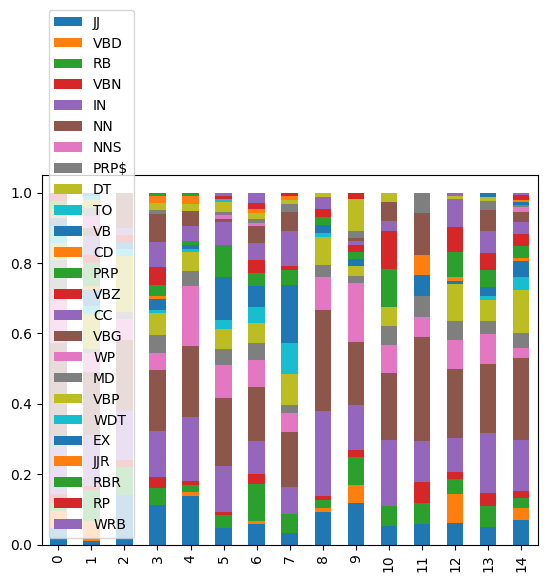

In [111]:
pos_data = []
for poem in poems:
    tokens = nltk.word_tokenize(poem.lower())
    pos_counts = count_pos(tokens)
    pos_data.append(pos_counts)

# Combine POS counts into a DataFrame
pos_df = pd.DataFrame(pos_data)
pos_df.fillna(0, inplace=True)

# Normalize the counts to get proportions
pos_df = pos_df.div(pos_df.sum(axis=1), axis=0)

# Plot the data using a stacked bar chart
pos_df.plot(kind='bar', stacked=True)
plt.show()

#4.“Gold/reference  standard” → What did the nominated poems have in common (common denominator)


In [112]:
pos_counts = []
for poem in poems:
    words = nltk.word_tokenize(poem)
    pos_tags = nltk.pos_tag(words)
    pos_counts.append(Counter([tag for word, tag in pos_tags]))

# Combine POS counts for all poems
total_counts = Counter()
for counts in pos_counts:
    total_counts += counts

# Calculate total number of words across all poems
total_words = sum(total_counts.values())

# Calculate proportion of each POS tag
pos_proportions = {tag: count / total_words for tag, count in total_counts.items()}

# Identify most common POS tags
most_common = total_counts.most_common(5)  # Top 5 most common tags

# Print results
print("Most common POS tags:")
for tag, count in most_common:
    print(f"{tag}: {count} ({pos_proportions[tag]:.2%})")




Most common POS tags:
NN: 251 (19.92%)
IN: 177 (14.05%)
NNS: 106 (8.41%)
DT: 97 (7.70%)
JJ: 92 (7.30%)


#5.Plot stats

In [113]:
print(most_common)

[('NN', 251), ('IN', 177), ('NNS', 106), ('DT', 97), ('JJ', 92)]


In [114]:
print(pos_proportions)

{'JJ': 0.07301587301587302, 'VBD': 0.023015873015873017, 'RB': 0.05317460317460317, 'VBN': 0.018253968253968255, 'IN': 0.14047619047619048, 'NN': 0.1992063492063492, 'NNS': 0.08412698412698413, 'PRP$': 0.04047619047619048, 'DT': 0.07698412698412699, 'TO': 0.023809523809523808, 'VB': 0.046825396825396826, 'CD': 0.004761904761904762, 'PRP': 0.04285714285714286, 'VBZ': 0.030952380952380953, 'CC': 0.049206349206349205, 'VBG': 0.03492063492063492, 'WP': 0.005555555555555556, 'MD': 0.010317460317460317, 'VBP': 0.01984126984126984, 'WDT': 0.0015873015873015873, 'EX': 0.002380952380952381, 'JJR': 0.005555555555555556, 'RBR': 0.0015873015873015873, 'RP': 0.006349206349206349, 'WRB': 0.004761904761904762}


In [115]:
sorted_pos_percentages = {k: v for k, v in sorted(pos_proportions.items(), key=lambda item: item[1], reverse=True)}


In [116]:
for tag, count in most_common:
  sorted_pos_percentages = {k: v for k, v in sorted(pos_proportions.items(), key=lambda item: item[1], reverse=True)}


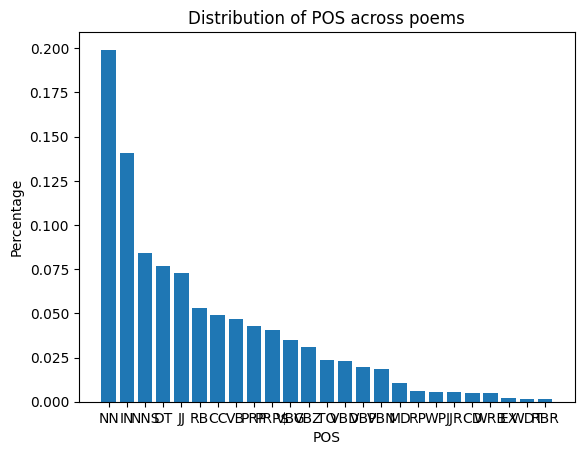

In [117]:
plt.bar(sorted_pos_percentages.keys(), sorted_pos_percentages.values())
plt.xlabel('POS')
plt.ylabel('Percentage')
plt.title('Distribution of POS across poems')
plt.show()

In [118]:
most_common_pos = {}
for tag, count in most_common:
  most_common_pos[tag] = pos_proportions[tag]

In [119]:
print(most_common_pos)

{'NN': 0.1992063492063492, 'IN': 0.14047619047619048, 'NNS': 0.08412698412698413, 'DT': 0.07698412698412699, 'JJ': 0.07301587301587302}


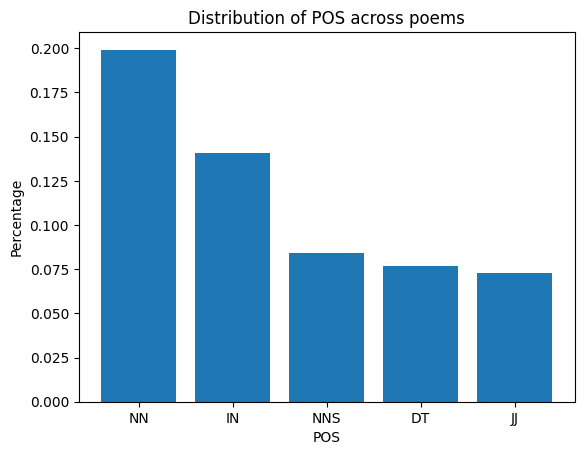

In [120]:
plt.bar(most_common_pos.keys(), most_common_pos.values())
plt.xlabel('POS')
plt.ylabel('Percentage')
plt.title('Distribution of POS across poems')
plt.show()

#B. Topic

##1. Analyze topics for the prize winning poems of that year


In [121]:
data.head()

,Unnamed: 0,Author,Title,Poem,Year,Poem_for_model,POS,dist_pos
0,0,Phoebe Bubendorfer,OIL SPILL,A red-throated loon\nmired in a slick of oil\n...,2022,red throated loon mired in slick of oil strain...,"[[(red, JJ)], [(throated, VBN)], [(loon, NN)],...","{'JJ': 2, 'VBN': 2, 'NN': 17, 'CD': 1, 'VBG': ..."
1,1,Bill Graeser,THE BURNING OF THE WHALES,Fire never seems to mind\nwhether it's the cur...,2022,fire never seems to mind whether it is the cur...,"[[(fire, NN)], [(never, RB)], [(seems, VBZ)], ...","{'NN': 26, 'RB': 5, 'VBZ': 1, 'IN': 1, 'VBG': ..."
2,2,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.\nStaring...,2022,the buffalo stands still in the wind staring a...,"[[(buffalo, NN)], [(stand, NN)], [(still, RB)]...","{'NN': 17, 'RB': 3, 'VBG': 5, 'JJ': 5, 'VBN': 1}"
3,3,Lily Nelson,FEVER,You are nine\n Lying on the front room co...,2022,you are nine lying on the front room couch and...,"[[(nine, CD)], [(lying, VBG)], [(front, NN)], ...","{'CD': 1, 'VBG': 6, 'NN': 34, 'IN': 7, 'RB': 2..."
4,4,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spine\n...,2022,the fingered notes play up and down my spine l...,"[[(fingered, VBN)], [(note, NN)], [(play, NN)]...","{'VBN': 2, 'NN': 48, 'IN': 2, 'VBG': 4, 'NNS':..."


In [122]:
data.drop(['Unnamed: 0'], axis=1)

,Author,Title,Poem,Year,Poem_for_model,POS,dist_pos
0,Phoebe Bubendorfer,OIL SPILL,A red-throated loon\nmired in a slick of oil\n...,2022,red throated loon mired in slick of oil strain...,"[[(red, JJ)], [(throated, VBN)], [(loon, NN)],...","{'JJ': 2, 'VBN': 2, 'NN': 17, 'CD': 1, 'VBG': ..."
1,Bill Graeser,THE BURNING OF THE WHALES,Fire never seems to mind\nwhether it's the cur...,2022,fire never seems to mind whether it is the cur...,"[[(fire, NN)], [(never, RB)], [(seems, VBZ)], ...","{'NN': 26, 'RB': 5, 'VBZ': 1, 'IN': 1, 'VBG': ..."
2,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.\nStaring...,2022,the buffalo stands still in the wind staring a...,"[[(buffalo, NN)], [(stand, NN)], [(still, RB)]...","{'NN': 17, 'RB': 3, 'VBG': 5, 'JJ': 5, 'VBN': 1}"
3,Lily Nelson,FEVER,You are nine\n Lying on the front room co...,2022,you are nine lying on the front room couch and...,"[[(nine, CD)], [(lying, VBG)], [(front, NN)], ...","{'CD': 1, 'VBG': 6, 'NN': 34, 'IN': 7, 'RB': 2..."
4,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spine\n...,2022,the fingered notes play up and down my spine l...,"[[(fingered, VBN)], [(note, NN)], [(play, NN)]...","{'VBN': 2, 'NN': 48, 'IN': 2, 'VBG': 4, 'NNS':..."
5,Allison Berryhill,SONNET TO MY STUDENTS ON THE FIRST DAY OF CLASS,Come in and make a mess with all your thoughts...,2021,come in and make mess with all your thoughts h...,"[[(come, VB)], [(make, VB)], [(mess, NN)], [(t...","{'VB': 2, 'NN': 45, 'JJ': 3, 'VBG': 2, 'NNS': ..."
6,Heather Ann Clark,TURTLE SHELLS,My therapist asks what else is on my mind.\n\n...,2021,my therapist asks what else is on my mind pith...,"[[(therapist, NN)], [(asks, NNS)], [(else, RB)...","{'NN': 39, 'NNS': 1, 'RB': 8, 'IN': 1, 'VBG': ..."
7,Jared Pearce,ILLNESS,It's like waiting for the elevator\ndoors to r...,2021,it is like waiting for the elevator doors to r...,"[[(like, IN)], [(waiting, VBG)], [(elevator, N...","{'IN': 3, 'VBG': 8, 'NN': 27, 'VB': 2, 'JJ': 4..."
8,Shelly Reed Thieman,ON THE ANNIVERSARY OF ANOTHER WINTER,"Tongue-tied with suet and peanut\nbutter, a qu...",2021,tongue tied with suet and peanut butter quarte...,"[[(tongue, NN)], [(tied, VBN)], [(suet, NN)], ...","{'NN': 45, 'VBN': 2, 'JJ': 2, 'VB': 1, 'RB': 1..."
9,Erik Trilk,DAZED AND CONFUSED,It won't be long until I'm with the moon\nthis...,2021,it will not be long until am with the moon thi...,"[[(long, RB)], [(moon, NN)], [(summer, NN)], [...","{'RB': 4, 'NN': 50, 'VBN': 6, 'JJ': 6, 'VBG': ..."


In [123]:
# Preprocess the poems
preprocessed_corpus = []
for poem in poems:
    # Tokenize the poem
    tokens = nltk.word_tokenize(poem)
    
    # Remove stop words and lemmatize words
    processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    
    # Add processed tokens to preprocessed_corpus
    preprocessed_corpus.append(processed_tokens)

# Create dictionary and bag-of-words representations of poems
dictionary = corpora.Dictionary(preprocessed_corpus)
bow_corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

# Create the document-term matrix
dtm = corpora.MmCorpus.serialize('dtm_corpus.mm', bow_corpus)

In [124]:
# Preprocess the poems
dictionary = corpora.Dictionary(preprocessed_corpus)
corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

In [125]:
from gensim.models import LdaModel

# Train an LDA model on the document-term matrix
lda_model = LdaModel(dtm, num_topics=5, id2word=dictionary, passes=10)


In [126]:
from gensim.models import CoherenceModel

# Compute the coherence score of the model
coherence_score = CoherenceModel(model=lda_model, texts=preprocessed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"Coherence Score: {coherence_score}")


Coherence Score: 0.7207924633127433


In [127]:
for topic_num, topic_words in lda_model.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

Topic 1: 0.002*"goose" + 0.002*"flag" + 0.002*"dream" + 0.002*"trying" + 0.002*"interlace" + 0.002*"broken" + 0.002*"pathway" + 0.002*"whether" + 0.002*"undertow" + 0.002*"night"
Topic 2: 0.002*"wiped" + 0.002*"acre" + 0.002*"macedonia" + 0.002*"nugget" + 0.002*"barreling" + 0.002*"every" + 0.002*"heart" + 0.002*"without" + 0.002*"unshaven" + 0.002*"experiment"
Topic 3: 0.002*"canadian" + 0.002*"blue" + 0.002*"europe" + 0.002*"many" + 0.002*"tip" + 0.002*"awning" + 0.002*"turtle" + 0.002*"secret" + 0.002*"interlace" + 0.002*"water"
Topic 4: 0.002*"turvy" + 0.002*"path" + 0.002*"patience" + 0.002*"design" + 0.002*"quartet" + 0.002*"next" + 0.002*"afternoon" + 0.002*"guide" + 0.002*"item" + 0.002*"pathway"
Topic 5: 0.002*"balance" + 0.002*"surface" + 0.002*"fire" + 0.002*"ice" + 0.002*"day" + 0.002*"deer" + 0.002*"chord" + 0.002*"undertow" + 0.002*"function" + 0.002*"finding"


In [128]:
preprocessed_corpus = []
    # Tokenize the poem
tokens = nltk.word_tokenize(data['Poem_for_model'][0])
    
    # Remove stop words and lemmatize words
processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    
    # Add processed tokens to preprocessed_corpus
preprocessed_corpus.append(processed_tokens)

# Create dictionary and bag-of-words representations of poems
dictionary = corpora.Dictionary(preprocessed_corpus)
bow_corpus = [dictionary.doc2bow(poem) for poem in preprocessed_corpus]

# Create the document-term matrix
dtm_p1 = corpora.MmCorpus.serialize('dtm_corpus.mm', bow_corpus)

lda_model_p1 = LdaModel(dtm_p1, num_topics=5, id2word=dictionary, passes=10)

coherence_score_p1 = CoherenceModel(model=lda_model_p1, texts=preprocessed_corpus, dictionary=dictionary, coherence='c_v').get_coherence()

print(f"Coherence Score: {coherence_score}")

for topic_num, topic_words in lda_model_p1.show_topics(num_topics=-1, num_words=10):
    print(f"Topic {topic_num+1}: {topic_words}")

Coherence Score: 0.7207924633127433
Topic 1: 0.045*"lift" + 0.044*"eye" + 0.043*"head" + 0.042*"slick" + 0.042*"toxic" + 0.042*"red" + 0.042*"acceptance" + 0.041*"closed" + 0.041*"neck" + 0.041*"last"
Topic 2: 0.046*"acceptance" + 0.045*"rainbow" + 0.043*"lower" + 0.043*"neck" + 0.043*"strain" + 0.043*"loon" + 0.043*"red" + 0.043*"toxic" + 0.042*"quiver" + 0.041*"eye"
Topic 3: 0.044*"last" + 0.043*"lift" + 0.043*"neck" + 0.042*"slick" + 0.042*"acceptance" + 0.042*"eye" + 0.041*"closed" + 0.041*"quiver" + 0.040*"rainbow" + 0.040*"wing"
Topic 4: 0.049*"throated" + 0.043*"breast" + 0.043*"feather" + 0.043*"toxic" + 0.043*"lift" + 0.042*"loon" + 0.042*"head" + 0.042*"body" + 0.041*"one" + 0.041*"mired"
Topic 5: 0.046*"mired" + 0.045*"last" + 0.045*"oil" + 0.045*"feather" + 0.045*"neck" + 0.044*"wing" + 0.043*"closed" + 0.043*"sludge" + 0.042*"toxic" + 0.041*"one"


In [129]:
def topic_model(poem):
  vectorizer = CountVectorizer()
  doc_term_matrix = vectorizer.fit_transform(poem)
  lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
  lda_model.fit(doc_term_matrix)
  for i, topic in enumerate(lda_model.components_):
    print(f"Topic {i}: {' '.join([vectorizer.get_feature_names()[index] for index in topic.argsort()[:-11:-1]])}")


In [130]:
def docterm_matrix(poem):
  poem = poem.translate(str.maketrans('', '', string.punctuation))
  print(poem)
  poem = poem.lower()
  words = word_tokenize(poem)
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if word not in stop_words]
  vectorizer = CountVectorizer()
  doc_term_matrix = vectorizer.fit_transform([' '.join(words)])
  return doc_term_matrix.toarray()
  

In [131]:
data['doc_term_matrix'] = 4

In [132]:
for i in range(len(data)):
  poem_str = data['Poem_for_model'][i]
  data['doc_term_matrix'][i] = docterm_matrix(poem_str)

red throated loon mired in slick of oil strains her neck in each effort to lift her body from the toxic sludge one last quiver of wings she lowers her head to her breast eyes closed in acceptance rainbows in her feathers


ValueError: setting an array element with a sequence.

In [ ]:
# Preprocess the poems
preprocessed_corpus = []
for i in range(len(data)):
    # Tokenize the poem
    tokens = nltk.word_tokenize(data['Poem_for_model'][i])
    
    # Remove stop words and lemmatize words
    processed_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    
    words = [nltk.word_tokenize(processed_token) for processed_token in processed_tokens]

In [ ]:
topic_model([data['Poem_for_model'][0]])

AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

#C. Sentiment Analysis 

## 1.Analyze sentiments for the prize winning poems of that year

In [ ]:
poem1 = data['Poem_for_model'][0]

In [ ]:
data['sentiment'] = {}

In [ ]:
def check_sentiment(poem):
  sid = SentimentIntensityAnalyzer()
  scores = sid.polarity_scores(poem)
  return scores

In [ ]:
for i in range(len(data)):
  poem = data['Poem_for_model'][i]
  data['sentiment'][i] = check_sentiment(poem)

In [ ]:
data.head()

,Unnamed: 0,Author,Title,Poem,Year,Poem_for_model,POS,dist_pos,doc_term_matrix,sentiment
0,0,Phoebe Bubendorfer,OIL SPILL,A red-throated loon\nmired in a slick of oil\n...,2022,red throated loon mired in slick of oil strain...,"[[(red, JJ)], [(throated, VBN)], [(loon, NN)],...","{'JJ': 2, 'VBN': 2, 'NN': 17, 'CD': 1, 'VBG': ...",4,"{'neg': 0.081, 'neu': 0.853, 'pos': 0.066, 'co..."
1,1,Bill Graeser,THE BURNING OF THE WHALES,Fire never seems to mind\nwhether it's the cur...,2022,fire never seems to mind whether it is the cur...,"[[(fire, NN)], [(never, RB)], [(seems, VBZ)], ...","{'NN': 26, 'RB': 5, 'VBZ': 1, 'IN': 1, 'VBG': ...",4,"{'neg': 0.106, 'neu': 0.847, 'pos': 0.047, 'co..."
2,2,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.\nStaring...,2022,the buffalo stands still in the wind staring a...,"[[(buffalo, NN)], [(stand, NN)], [(still, RB)]...","{'NN': 17, 'RB': 3, 'VBG': 5, 'JJ': 5, 'VBN': 1}",4,"{'neg': 0.047, 'neu': 0.833, 'pos': 0.12, 'com..."
3,3,Lily Nelson,FEVER,You are nine\n Lying on the front room co...,2022,you are nine lying on the front room couch and...,"[[(nine, CD)], [(lying, VBG)], [(front, NN)], ...","{'CD': 1, 'VBG': 6, 'NN': 34, 'IN': 7, 'RB': 2...",4,"{'neg': 0.052, 'neu': 0.802, 'pos': 0.146, 'co..."
4,4,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spine\n...,2022,the fingered notes play up and down my spine l...,"[[(fingered, VBN)], [(note, NN)], [(play, NN)]...","{'VBN': 2, 'NN': 48, 'IN': 2, 'VBG': 4, 'NNS':...",4,"{'neg': 0.032, 'neu': 0.656, 'pos': 0.312, 'co..."


In [ ]:
def plot_dist_sentiment(dict):
  senti = list(dict.keys())
  counts = list(dict.values())

  # Create a bar plot
  plt.bar(senti, counts)
  plt.xlabel('Sentiment')
  plt.ylabel('Count')
  plt.title('Distribution of Sentiments in Pushcart NOminated Poem')
  plt.show()

The compound score is a metric used in sentiment analysis to represent the overall polarity of a text, ranging from -1 (most negative) to +1 (most positive). It takes into account the values of the positive, negative, and neutral scores and is calculated using a normalization method. The compound score can be used to quickly determine the sentiment of a text and can be used to compare the sentiment of different texts.

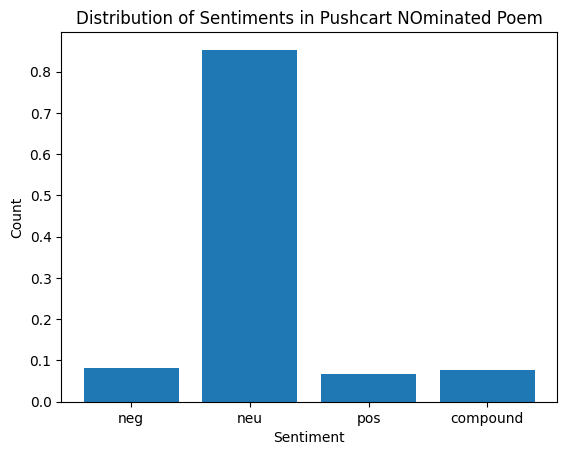

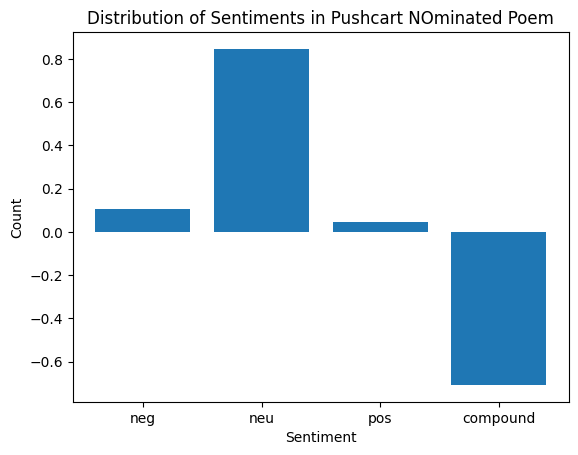

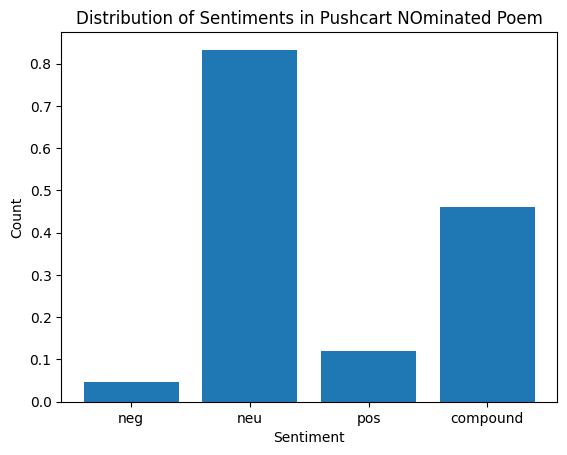

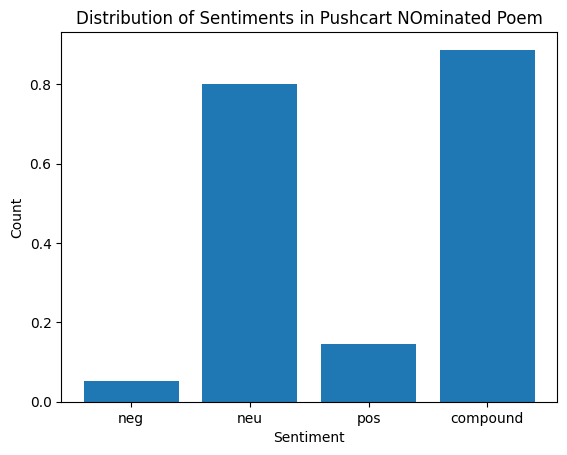

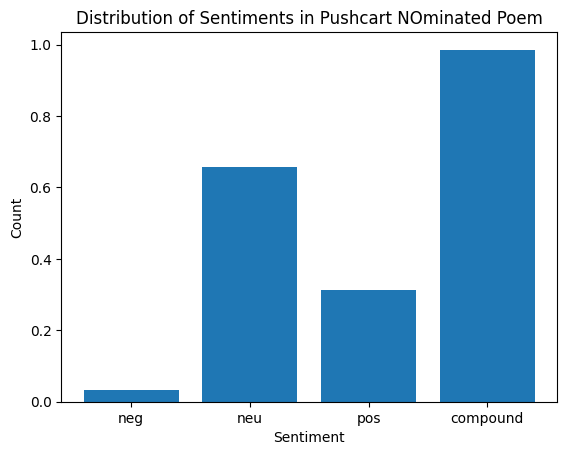

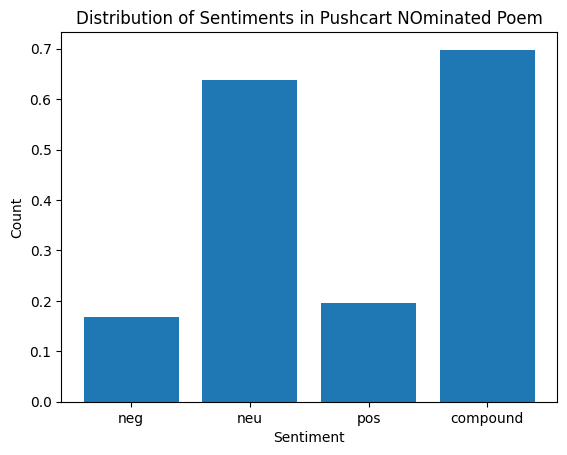

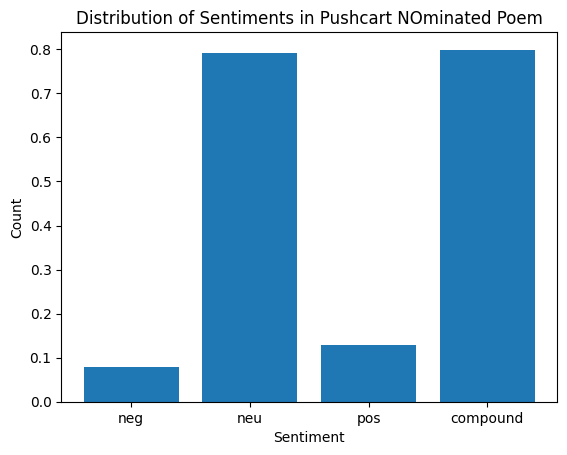

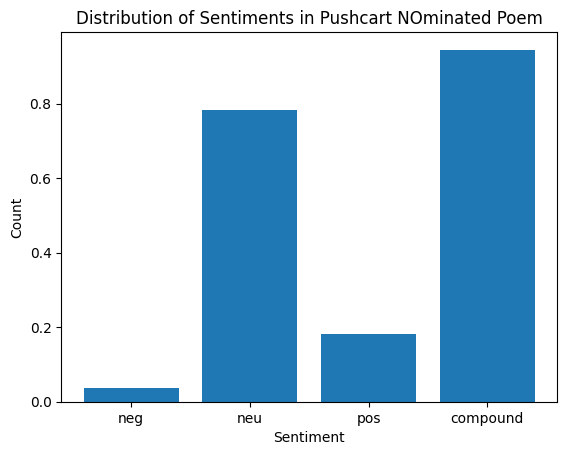

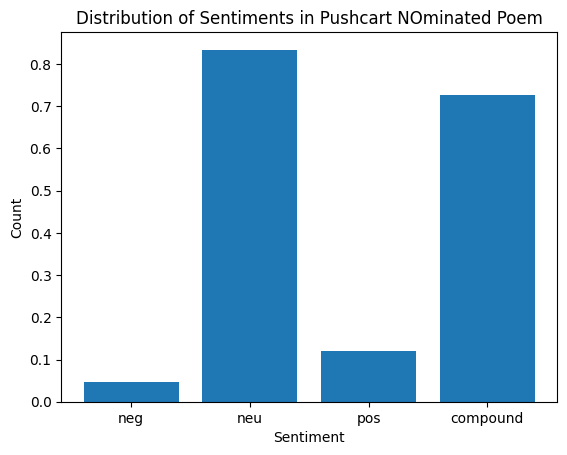

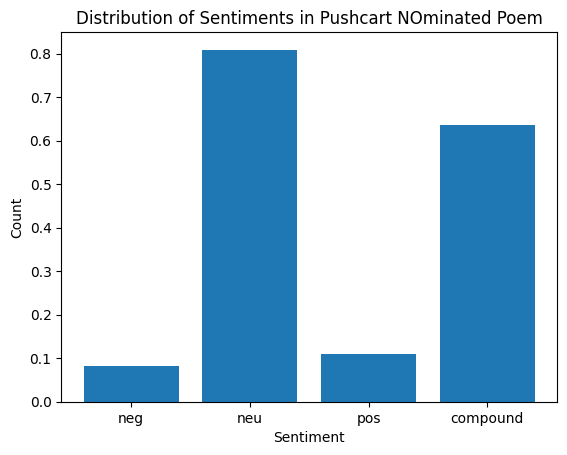

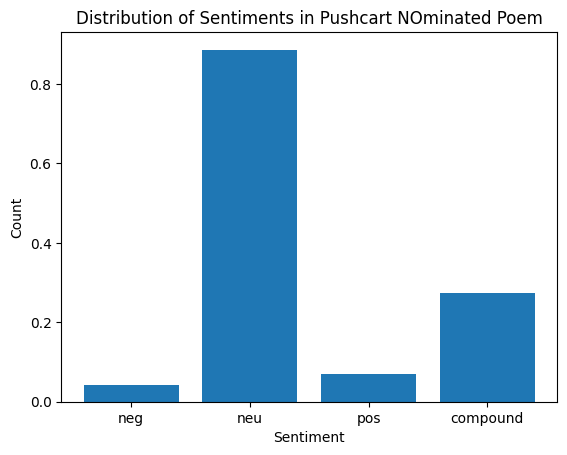

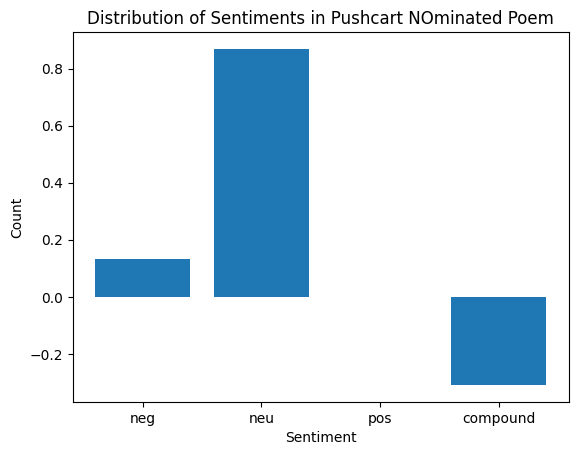

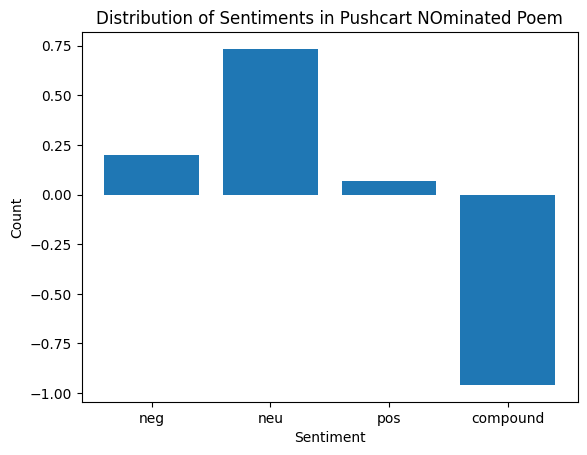

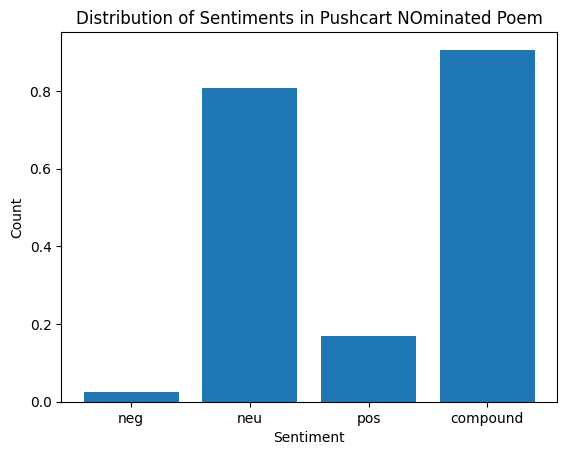

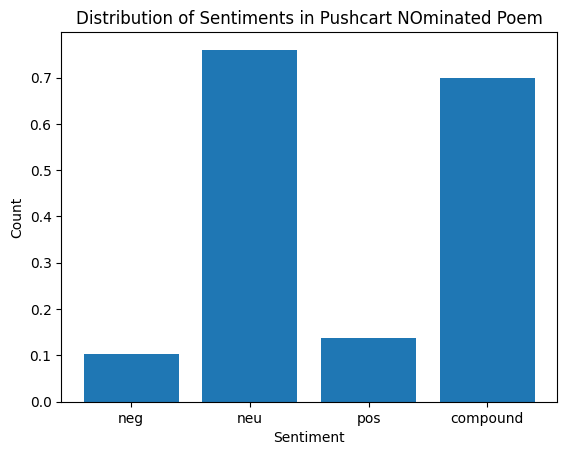

In [ ]:
for i in range(len(data)):
  plot_dist_sentiment(data['sentiment'][i])

In [133]:
data.head()

,Unnamed: 0,Author,Title,Poem,Year,Poem_for_model,POS,dist_pos,doc_term_matrix
0,0,Phoebe Bubendorfer,OIL SPILL,A red-throated loon\nmired in a slick of oil\n...,2022,red throated loon mired in slick of oil strain...,"[[(red, JJ)], [(throated, VBN)], [(loon, NN)],...","{'JJ': 2, 'VBN': 2, 'NN': 17, 'CD': 1, 'VBG': ...",4
1,1,Bill Graeser,THE BURNING OF THE WHALES,Fire never seems to mind\nwhether it's the cur...,2022,fire never seems to mind whether it is the cur...,"[[(fire, NN)], [(never, RB)], [(seems, VBZ)], ...","{'NN': 26, 'RB': 5, 'VBZ': 1, 'IN': 1, 'VBG': ...",4
2,2,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.\nStaring...,2022,the buffalo stands still in the wind staring a...,"[[(buffalo, NN)], [(stand, NN)], [(still, RB)]...","{'NN': 17, 'RB': 3, 'VBG': 5, 'JJ': 5, 'VBN': 1}",4
3,3,Lily Nelson,FEVER,You are nine\n Lying on the front room co...,2022,you are nine lying on the front room couch and...,"[[(nine, CD)], [(lying, VBG)], [(front, NN)], ...","{'CD': 1, 'VBG': 6, 'NN': 34, 'IN': 7, 'RB': 2...",4
4,4,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spine\n...,2022,the fingered notes play up and down my spine l...,"[[(fingered, VBN)], [(note, NN)], [(play, NN)]...","{'VBN': 2, 'NN': 48, 'IN': 2, 'VBG': 4, 'NNS':...",4


In [140]:
data.drop(['Unnamed: 0'], axis=1).to_json(r'Pushcart_nomination.json',orient='columns')


In [143]:
with open('Pushcart_nomination.json') as f:
    data_json= pd.read_json(f, orient='columns')

In [144]:
data_json.head()

,Author,Title,Poem,Year,Poem_for_model,POS,dist_pos,doc_term_matrix
0,Phoebe Bubendorfer,OIL SPILL,A red-throated loon\nmired in a slick of oil\n...,2022,red throated loon mired in slick of oil strain...,"[[[red, JJ]], [[throated, VBN]], [[loon, NN]],...","{'JJ': 2, 'VBN': 2, 'NN': 17, 'CD': 1, 'VBG': ...",4
1,Bill Graeser,THE BURNING OF THE WHALES,Fire never seems to mind\nwhether it's the cur...,2022,fire never seems to mind whether it is the cur...,"[[[fire, NN]], [[never, RB]], [[seems, VBZ]], ...","{'NN': 26, 'RB': 5, 'VBZ': 1, 'IN': 1, 'VBG': ...",4
2,John Mitchell,THE BUFFALO,The buffalo stands still in the wind.\nStaring...,2022,the buffalo stands still in the wind staring a...,"[[[buffalo, NN]], [[stand, NN]], [[still, RB]]...","{'NN': 17, 'RB': 3, 'VBG': 5, 'JJ': 5, 'VBN': 1}",4
3,Lily Nelson,FEVER,You are nine\n Lying on the front room co...,2022,you are nine lying on the front room couch and...,"[[[nine, CD]], [[lying, VBG]], [[front, NN]], ...","{'CD': 1, 'VBG': 6, 'NN': 34, 'IN': 7, 'RB': 2...",4
4,Lucille Morgan Wilson,LISTENING TO DVORAK'S HUMORESQUE,The fingered notes play up and down my spine\n...,2022,the fingered notes play up and down my spine l...,"[[[fingered, VBN]], [[note, NN]], [[play, NN]]...","{'VBN': 2, 'NN': 48, 'IN': 2, 'VBG': 4, 'NNS':...",4


#D. [Extra credit]Build and Use Knowledge Graphs for 2 poems, 2 Pushcart nominated poems

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Babelscape/rebel-large")
model = AutoModelForSeq2SeqLM.from_pretrained("Babelscape/rebel-large")

Bad pipe message: %s [b"\xb7\x8c\x10\x1c\x11\x8cLA\xae{o\xc4M\xb5Y\x07\xf0| \x9c1r\xfd\x8d\xbb\x86\xb4Vd\x80wV6(\xb6\xe8\x95\x9a\xc2{1$\xb0\xb4\x8a\xc2 'Y\xb0y\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003"]
Bad pipe message: %s [b'\xe6N!!\x1a=O!\xda\xaa\xe6\x0ec\xb1\xcf{\xc0C\x00\x00\xf4\xc00\xc0,\xc0(\xc0$\xc0\x14\xc0\n\x00\xa5\x00\xa3\x00\xa1\x00\x9f\x00k\x00j\x00i\x00h\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00\xa7\x00m\x00:']
Bad pipe message: %s [b'\xf8~v\x80>\xd5rG\xd9\xff\xb2\x98U\xb7\xe4\xea\xca\xf9\x00\x00\x86\xc00\xc0,']
Bad pipe message: %s [b'\x01\x8b\xa8\x8d?\x10%\x13p\x0e<V\xd8', b"M\xe

In [ ]:
def extract_relations_from_model_output(text):
    relations = []
    relation, subject, relation, object_ = '', '', '', ''
    text = text.strip()
    current = 'x'
    text_replaced = text.replace("<s>", "").replace("<pad>", "").replace("</s>", "")
    for token in text_replaced.split():
        if token == "<triplet>":
            current = 't'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
                relation = ''
            subject = ''
        elif token == "<subj>":
            current = 's'
            if relation != '':
                relations.append({
                    'head': subject.strip(),
                    'type': relation.strip(),
                    'tail': object_.strip()
                })
            object_ = ''
        elif token == "<obj>":
            current = 'o'
            relation = ''
        else:
            if current == 't':
                subject += ' ' + token
            elif current == 's':
                object_ += ' ' + token
            elif current == 'o':
                relation += ' ' + token
    if subject != '' and relation != '' and object_ != '':
        relations.append({
            'head': subject.strip(),
            'type': relation.strip(),
            'tail': object_.strip()
        })
    return relations

In [ ]:
class KB():
    def __init__(self):
        self.entities = {}
        self.relations = []

    def are_relations_equal(self, r1, r2):
        return all(r1[attr] == r2[attr] for attr in ["head", "type", "tail"])

    def exists_relation(self, r1):
        return any(self.are_relations_equal(r1, r2) for r2 in self.relations)

    def merge_relations(self, r1):
        r2 = [r for r in self.relations
              if self.are_relations_equal(r1, r)][0]
        spans_to_add = [span for span in r1["meta"]["spans"]
                        if span not in r2["meta"]["spans"]]
        r2["meta"]["spans"] += spans_to_add

    def get_wikipedia_data(self, candidate_entity):
        try:
            page = wikipedia.page(candidate_entity, auto_suggest=False)
            entity_data = {
                "title": page.title,
                "url": page.url,
                "summary": page.summary
            }
            return entity_data
        except:
            return None

    def add_entity(self, e):
        self.entities[e["title"]] = {k:v for k,v in e.items() if k != "title"}

    def add_relation(self, r):
        # check on wikipedia
        candidate_entities = [r["head"], r["tail"]]
        entities = [self.get_wikipedia_data(ent) for ent in candidate_entities]

        # if one entity does not exist, stop
        if any(ent is None for ent in entities):
            return

        # manage new entities
        for e in entities:
            self.add_entity(e)

        # rename relation entities with their wikipedia titles
        r["head"] = entities[0]["title"]
        r["tail"] = entities[1]["title"]

        # manage new relation
        if not self.exists_relation(r):
            self.relations.append(r)
        else:
            self.merge_relations(r)

    def print(self):
        print("Entities:")
        for e in self.entities.items():
            print(f"  {e}")
        print("Relations:")
        for r in self.relations:
            print(f"  {r}")

In [ ]:
def from_text_to_kb(text, span_length=128, verbose=False):
    # tokenize whole text
    inputs = tokenizer([text], return_tensors="pt")

    # compute span boundaries
    num_tokens = len(inputs["input_ids"][0])
    if verbose:
        print(f"Input has {num_tokens} tokens")
    num_spans = math.ceil(num_tokens / span_length)
    if verbose:
        print(f"Input has {num_spans} spans")
    overlap = math.ceil((num_spans * span_length - num_tokens) / 
                        max(num_spans - 1, 1))
    spans_boundaries = []
    start = 0
    for i in range(num_spans):
        spans_boundaries.append([start + span_length * i,
                                 start + span_length * (i + 1)])
        start -= overlap
    if verbose:
        print(f"Span boundaries are {spans_boundaries}")

    # transform input with spans
    tensor_ids = [inputs["input_ids"][0][boundary[0]:boundary[1]]
                  for boundary in spans_boundaries]
    tensor_masks = [inputs["attention_mask"][0][boundary[0]:boundary[1]]
                    for boundary in spans_boundaries]
    inputs = {
        "input_ids": torch.stack(tensor_ids),
        "attention_mask": torch.stack(tensor_masks)
    }

    # generate relations
    num_return_sequences = 3
    gen_kwargs = {
        "max_length": 256,
        "length_penalty": 0,
        "num_beams": 3,
        "num_return_sequences": num_return_sequences
    }
    generated_tokens = model.generate(
        **inputs,
        **gen_kwargs,
    )

    # decode relations
    decoded_preds = tokenizer.batch_decode(generated_tokens,
                                           skip_special_tokens=False)

    # create kb
    kb = KB()
    i = 0
    for sentence_pred in decoded_preds:
        current_span_index = i // num_return_sequences
        relations = extract_relations_from_model_output(sentence_pred)
        for relation in relations:
            relation["meta"] = {
                "spans": [spans_boundaries[current_span_index]]
            }
            kb.add_relation(relation)
        i += 1

    return kb

In [ ]:
text = data['Poem_for_model'][0]

kb = from_text_to_kb(text, verbose=True)
kb.print()

Input has 50 tokens
Input has 1 spans
Span boundaries are [[0, 128]]
Relations:
  {'head': 'breast', 'type': 'part of', 'tail': 'breast', 'meta': {'spans': [[0, 128]]}}
  {'head': 'rainbows', 'type': 'named after', 'tail': 'rainbows', 'meta': {'spans': [[0, 128]]}}
  {'head': 'her neck', 'type': 'part of', 'tail': 'her head', 'meta': {'spans': [[0, 128]]}}


In [ ]:
def save_network_html(kb, filename):
    # create network
    net = Network(directed=True, width="700px", height="700px", bgcolor="#eeeeee")

    # nodes
    color_entity = "#00FF00"
    for e in kb.entities:
        net.add_node(e, shape="circle", color=color_entity)

    # edges
    for r in kb.relations:
        net.add_edge(r["head"], r["tail"],
                    title=r["type"], label=r["type"])
        
    # save network
    net.repulsion(
        node_distance=200,
        central_gravity=0.2,
        spring_length=200,
        spring_strength=0.05,
        damping=0.09
    )
    net.set_edge_smooth('dynamic')
    net.show(filename)

In [ ]:
import IPython

In [ ]:
print(kb)

In [ ]:
text = data['Poem_for_model'][0]
kb = from_text_to_kb(text, verbose=True)
filename = "network_0_poem.html"
save_network_html(kb, filename=filename)
save_kb(kb, filename.split(".")[0] + ".p")
IPython.display.HTML(filename=filename)

Input has 50 tokens
Input has 1 spans
Span boundaries are [[0, 128]]
network_0_poem.html


AttributeError: 'NoneType' object has no attribute 'render'